## Setup
You need to build the Fortran into python extension modules before you do anything else. I did this:

    cd .../tools/ellippy/src
    python setup.py install --home='../../packages/'
    
then, before starting the notebook server:

    export PYTHONPATH="../tools:../:../tools/packages/lib/python/"
    
to get access to our stuff

## Background
We are using the approach described by Dziewonski and Gilbert
(1976; http://dx.doi.org/10.1111/j.1365-246X.1976.tb00271.x) and
Kennett and Gudmundsson (1996; http://dx.doi.org/10.1111/j.1365-246X.1996.tb01533.x).
Briefly, the travel time correction, $\delta t$ is given by:

$\delta t = \sum_{m=0}^3 \sigma_m(z_s,\Delta)P_{2,m}(\cos\vartheta_0)\cos_m\zeta$,

where $\Delta$ is the epicentral distance, $z_s$ is the source depth, $\vartheta_0$ is
the source co-latitude, and $\zeta$ is the azimuth from the source to the recever. 
$P_{l,m}$ are associated Legendre polynomials and $\sigma_m(z_s,\Delta)$ are integrals 
over the ray path which are tabulated in the implementation we are using. The correction 
is thus nothing beyond the evaluation and summation of three sperical harmonics.

In principle it would be nice to calculate $\sigma_m(z_s,\Delta)$ for any 1D velocity
model. I think `obspy.taup` gives us everything we need to do this from Equation 1.3 of
Kennett and Gudmundsson (1996), but for now we will use the precomputed tables from ak135. 


## Simple example

In [1]:
# Import the ellip correction code
import ellippy

In [2]:
# Now setup direct access tables
ellippy.ellip_setup()

In [3]:
# Corrections can be calculated thus:
src_lat = 10.0
src_depth = 10.0
azim = 10.0
delta = 10.0
phase = 'PcP'
print ellippy.ellip_correct(src_lat, src_depth, azim, delta, phase)

0.576326668262


## Application to a dataset

In [4]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
import mpl_toolkits.basemap as basemap
# Make the figures big
plt.rcParams['figure.figsize'] = (12, 8)

import pandas
import numpy as np

# Our ISC parser
import read_ISC

In [5]:
all_picks = read_ISC.read_picks('../data/ISC_Jan_2012_trim.dat', ('P', 'PcP'))
paired_picks = read_ISC.pair_picks(all_picks, 'PcP', 'P')
paired_picks_df = pandas.DataFrame.from_dict(paired_picks, orient='index')
paired_picks_df["PcP_ttime"] = paired_picks_df.PcP_datetime - paired_picks_df.event_datetime
paired_picks_df["P_ttime"] = paired_picks_df.P_datetime - paired_picks_df.event_datetime
paired_picks_df["PcP_P_dtime"] = paired_picks_df.PcP_ttime - paired_picks_df.P_ttime

In [6]:
paired_picks_df

,eventid,P_datetime,station_lon,reporter,PcP_datetime,epicentral_distance,station_elev,event_lat,station,backazimuth,event_depth,event_lon,event_datetime,station_lat,PcP_ttime,P_ttime,PcP_P_dtime
600130102GTABJI,600130102,2012-01-01 00:38:39.200,99.8144,BJI,2012-01-01 00:40:10.900,47.42,1341.0,11.9775,GTA,313.2,27.5,143.7081,2012-01-01 00:30:07.200,39.4106,00:10:03.700000,00:08:32,00:01:31.700000
600130102GYABJI,600130102,2012-01-01 00:37:21.200,106.6640,BJI,2012-01-01 00:39:38.700,37.67,1162.0,11.9775,GYA,297.9,27.5,143.7081,2012-01-01 00:30:07.200,26.4586,00:09:31.500000,00:07:14,00:02:17.500000
600130102KLRIDC,600130102,2012-01-01 00:37:25.400,131.7500,IDC,2012-01-01 00:39:39.170,38.44,298.0,11.9775,KLR,347.4,27.5,143.7081,2012-01-01 00:30:07.200,49.2300,00:09:31.970000,00:07:18.200000,00:02:13.770000
600130102KSHBJI,600130102,2012-01-01 00:40:50.000,75.9731,BJI,2012-01-01 00:41:23.300,65.33,1314.0,11.9775,KSH,308.0,27.5,143.7081,2012-01-01 00:30:07.200,39.5167,00:11:16.100000,00:10:42.800000,00:00:33.300000
600130102PETKIDC,600130102,2012-01-01 00:38:00.270,157.6989,IDC,2012-01-01 00:39:51.750,42.53,400.0,11.9775,PETK,12.5,27.5,143.7081,2012-01-01 00:30:07.200,53.1082,00:09:44.550000,00:07:53.070000,00:01:51.480000
600130102SONMIDC,600130102,2012-01-01 00:38:39.360,106.3950,IDC,2012-01-01 00:40:09.380,47.41,1415.8,11.9775,SONM,326.3,27.5,143.7081,2012-01-01 00:30:07.200,47.8347,00:10:02.180000,00:08:32.160000,00:01:30.020000
600130102ZALVIDC,600130102,2012-01-01 00:40:26.100,84.8188,IDC,2012-01-01 00:41:05.750,62.28,229.4,11.9775,ZALV,325.1,27.5,143.7081,2012-01-01 00:30:07.200,53.9481,00:10:58.550000,00:10:18.900000,00:00:39.650000
600130103AS01NEIC,600130103,2012-01-01 00:56:35.790,133.9510,NEIC,2012-01-01 00:59:19.090,33.03,605.0,-11.3505,AS01,243.9,37.0,166.2200,2012-01-01 00:50:04.840,-23.6647,00:09:14.250000,00:06:30.950000,00:02:43.300000
600130103ASARIDC,600130103,2012-01-01 00:56:36.100,133.9040,IDC,2012-01-01 00:59:19.400,33.07,607.0,-11.3505,ASAR,243.9,37.0,166.2200,2012-01-01 00:50:04.840,-23.6664,00:09:14.560000,00:06:31.260000,00:02:43.300000
600130103STKAIDC,600130103,2012-01-01 00:56:15.400,141.5952,IDC,2012-01-01 00:59:13.370,30.55,272.3,-11.3505,STKA,224.2,37.0,166.2200,2012-01-01 00:50:04.840,-31.8769,00:09:08.530000,00:06:10.560000,00:02:57.970000


In [6]:
# Calculate the corrections.
#TODO: Add azimuth to this table and use that
# These corrections are approximate because azimuth != 360-backazimuth on a sphere.  We can get an
# answer by swapping the receiver and the source and using the backazimuth as the azimuth, but we
# will be slightly wrong because of the depths (i.e., the receiver isn't at the depth of the source).
paired_picks_df["P_ellip_corr"] = paired_picks_df.apply(
    lambda row: ellippy.ellip_correct(row['station_lat'], 
                                      row['event_depth'], 
                                      row['backazimuth'],
                                      row['epicentral_distance'], 'P'), axis=1)

paired_picks_df["PcP_ellip_corr"] = paired_picks_df.apply(
    lambda row: ellippy.ellip_correct(row['station_lat'], 
                                      row['event_depth'], 
                                      row['backazimuth'],
                                      row['epicentral_distance'], 'PcP'), axis=1)

In [7]:
paired_picks_df

,eventid,P_datetime,station_lon,reporter,PcP_datetime,epicentral_distance,station_elev,event_lat,station,backazimuth,event_depth,event_lon,event_datetime,station_lat,PcP_ttime,P_ttime,PcP_P_dtime,P_ellip_corr,PcP_ellip_corr
600130102GTABJI,600130102,2012-01-01 00:38:39.200,99.8144,BJI,2012-01-01 00:40:10.900,47.42,1341.0,11.9775,GTA,313.2,27.5,143.7081,2012-01-01 00:30:07.200,39.4106,00:10:03.700000,00:08:32,00:01:31.700000,-0.287106,-0.381045
600130102GYABJI,600130102,2012-01-01 00:37:21.200,106.6640,BJI,2012-01-01 00:39:38.700,37.67,1162.0,11.9775,GYA,297.9,27.5,143.7081,2012-01-01 00:30:07.200,26.4586,00:09:31.500000,00:07:14,00:02:17.500000,0.107342,0.148343
600130102KLRIDC,600130102,2012-01-01 00:37:25.400,131.7500,IDC,2012-01-01 00:39:39.170,38.44,298.0,11.9775,KLR,347.4,27.5,143.7081,2012-01-01 00:30:07.200,49.2300,00:09:31.970000,00:07:18.200000,00:02:13.770000,-0.620455,-0.937399
600130102KSHBJI,600130102,2012-01-01 00:40:50.000,75.9731,BJI,2012-01-01 00:41:23.300,65.33,1314.0,11.9775,KSH,308.0,27.5,143.7081,2012-01-01 00:30:07.200,39.5167,00:11:16.100000,00:10:42.800000,00:00:33.300000,-0.130653,-0.128853
600130102PETKIDC,600130102,2012-01-01 00:38:00.270,157.6989,IDC,2012-01-01 00:39:51.750,42.53,400.0,11.9775,PETK,12.5,27.5,143.7081,2012-01-01 00:30:07.200,53.1082,00:09:44.550000,00:07:53.070000,00:01:51.480000,-0.692625,-0.980852
600130102SONMIDC,600130102,2012-01-01 00:38:39.360,106.3950,IDC,2012-01-01 00:40:09.380,47.41,1415.8,11.9775,SONM,326.3,27.5,143.7081,2012-01-01 00:30:07.200,47.8347,00:10:02.180000,00:08:32.160000,00:01:30.020000,-0.542957,-0.716070
600130102ZALVIDC,600130102,2012-01-01 00:40:26.100,84.8188,IDC,2012-01-01 00:41:05.750,62.28,229.4,11.9775,ZALV,325.1,27.5,143.7081,2012-01-01 00:30:07.200,53.9481,00:10:58.550000,00:10:18.900000,00:00:39.650000,-0.528512,-0.580312
600130103AS01NEIC,600130103,2012-01-01 00:56:35.790,133.9510,NEIC,2012-01-01 00:59:19.090,33.03,605.0,-11.3505,AS01,243.9,37.0,166.2200,2012-01-01 00:50:04.840,-23.6647,00:09:14.250000,00:06:30.950000,00:02:43.300000,0.158366,0.245593
600130103ASARIDC,600130103,2012-01-01 00:56:36.100,133.9040,IDC,2012-01-01 00:59:19.400,33.07,607.0,-11.3505,ASAR,243.9,37.0,166.2200,2012-01-01 00:50:04.840,-23.6664,00:09:14.560000,00:06:31.260000,00:02:43.300000,0.158431,0.245514
600130103STKAIDC,600130103,2012-01-01 00:56:15.400,141.5952,IDC,2012-01-01 00:59:13.370,30.55,272.3,-11.3505,STKA,224.2,37.0,166.2200,2012-01-01 00:50:04.840,-31.8769,00:09:08.530000,00:06:10.560000,00:02:57.970000,-0.116333,-0.205032


## Look at the PcP-P data with the correction

In [8]:
# Get access to taup
import obspy.taup

In [13]:
# Create the Earth model
# iasp91 is built in and 
# distributed with the code
earth_model = obspy.taup.TauPyModel(model="iasp91")

def calc_P_PcP(epi, z):
    arrivals = earth_model.get_travel_times(z, epi, phase_list=['PcP','P'])
    # Use the last arrival as PcP - to avoid problems with
    # P triplications.
    PcP_P_time = arrivals[-1].time - arrivals[0].time
    return PcP_P_time

paired_picks_df["PcP_P_dtime_calc_secs"] = paired_picks_df.apply(
    lambda row: calc_P_PcP(row['epicentral_distance'], row['event_depth']), axis=1)

In [14]:
# For plotting timedeltas, we need the delay time in seconds (not as a timedelta64)
paired_picks_df["PcP_P_dtime_secs"] = paired_picks_df.PcP_P_dtime.values / np.timedelta64(1, 's')
# -ve is early (w.r.t. model)
paired_picks_df["PcP_P_resid"] = paired_picks_df.PcP_P_dtime_secs - paired_picks_df.PcP_P_dtime_calc_secs

In [15]:
# correction to PcP - P for spherical Earth
paired_picks_df["PcP_P_resid_ellip"] = paired_picks_df.PcP_P_dtime_secs - (
    paired_picks_df.PcP_P_dtime_calc_secs + paired_picks_df["P_ellip_corr"] + 
    paired_picks_df["PcP_ellip_corr"])

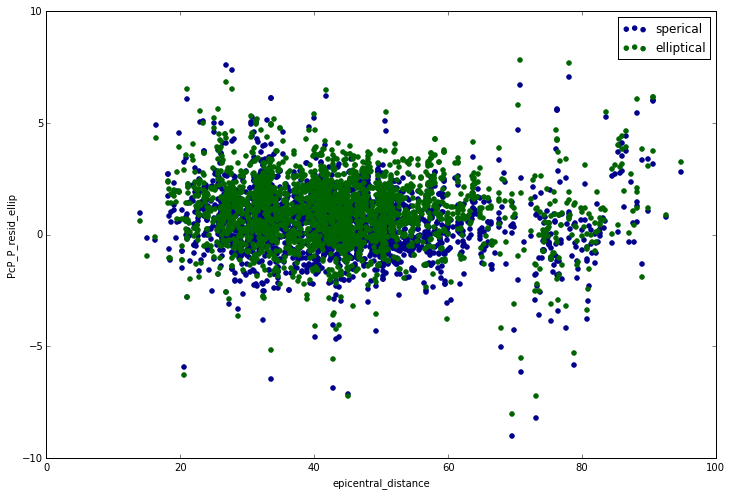

In [16]:
ax = paired_picks_df.plot(kind='scatter', x='epicentral_distance', y='PcP_P_resid', 
                          color='DarkBlue', label='sperical')
paired_picks_df.plot(kind='scatter', x='epicentral_distance', y='PcP_P_resid_ellip', 
                          color='DarkGreen', label='elliptical', ax=ax)


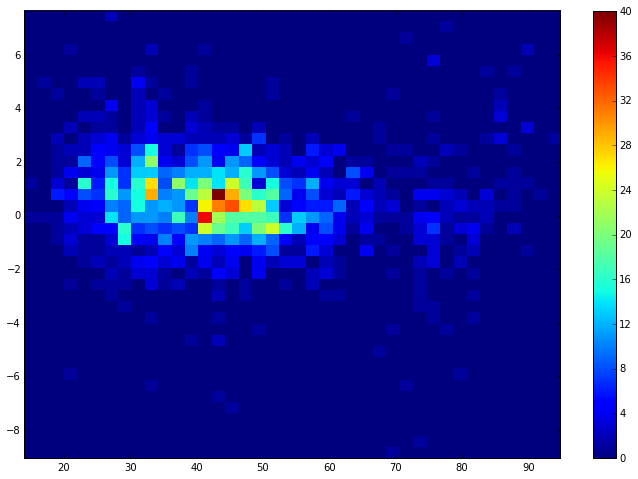

In [17]:
# Histogram with out ellip
plt.hist2d(paired_picks_df.epicentral_distance.values, 
       paired_picks_df.PcP_P_resid.values, 
       bins=40)
plt.colorbar()
plt.show()

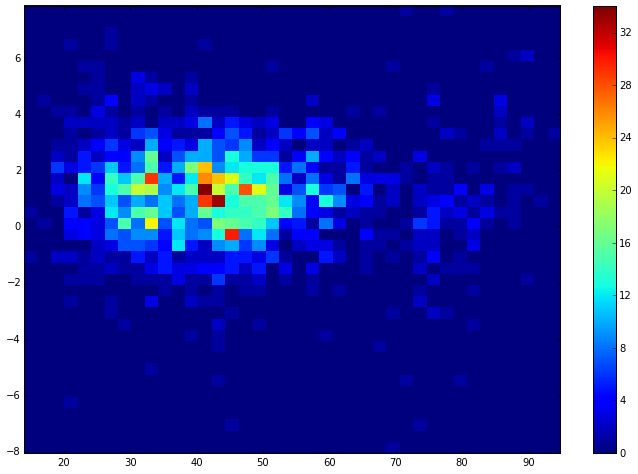

In [18]:
# With ellip
plt.hist2d(paired_picks_df.epicentral_distance.values, 
       paired_picks_df.PcP_P_resid_ellip.values, 
       bins=40)
plt.colorbar()
plt.show()

So, it looks like a small correction on PcP - P!